In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [3]:
Univ=pd.read_csv("C:/Users/2ez4rtz/Desktop/Github repository/materials/python/Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
#Normalization function
#def norm_func(i):
 #   x = (i-i.min())	/	(i.max()	-	i.min())
  #  return (x)

In [5]:
def norm_func(i):
    x=(i-i.mean())/(i.std())
    return(x)


In [6]:
# Normalized data frame (considering the numerical part of data)
df_norm=norm_func(Univ.iloc[:,1:])

In [7]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
 

In [8]:
type(df_norm)

pandas.core.frame.DataFrame

In [9]:
#p = np.array(df_norm) # converting into numpy array format 


In [10]:
z=linkage(df_norm,method='complete',metric='euclidean')


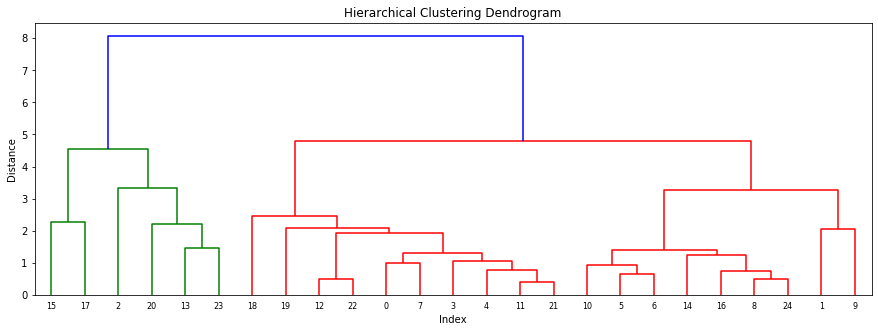

In [11]:
plt.figure(figsize=(15,5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,#rotates the x axis labels
    leaf_font_size=8.,#font size of x axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(df_norm)

In [ ]:
cluster_labels=pd.Series(h_complete.labels_)



In [ ]:
Univ['clust']=cluster_labels #creating a new column and assigning it to new column
Univ=Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()

In [ ]:
Univ.iloc[:,2:].groupby(Univ.clust).median()

In [ ]:
Univ.to_csv('University.csv',encoding='utf-8')